In [32]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

In [33]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [34]:
interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

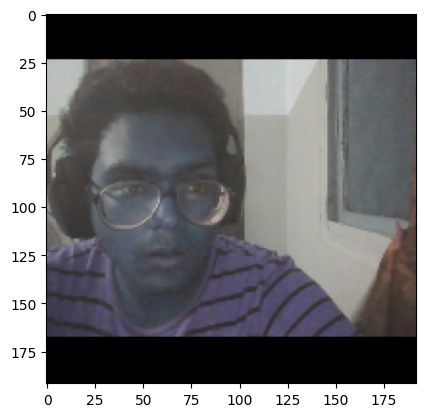

In [35]:
plt.imshow(tf.cast(np.squeeze(img), dtype=tf.int32))

In [36]:
img = frame.copy()

In [37]:
img.shape

(480, 640, 3)

In [38]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 312,
  'shape': array([ 1,  1, 17,  3]),
  'shape_signature': array([ 1,  1, 17,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    print(keypoints_with_scores)
    
    # Rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[[[[0.6096582  0.28873172 0.5613397 ]
   [0.5057775  0.36580318 0.48076177]
   [0.51813895 0.20155433 0.69751185]
   [0.51120675 0.45958877 0.6144388 ]
   [0.52169865 0.10103647 0.5294347 ]
   [0.7112967  0.62143624 0.3868514 ]
   [0.75108236 0.01776025 0.19006819]
   [0.9421448  0.7884466  0.02518913]
   [0.95865583 0.02386117 0.05264395]
   [0.7764637  0.53561926 0.00782609]
   [0.875147   0.13018852 0.02810079]
   [0.36969668 0.47955775 0.02302369]
   [0.4843812  0.01793962 0.03898859]
   [0.8260364  0.9710343  0.0122664 ]
   [0.7171316  0.01257453 0.01149258]
   [0.64731    0.5374989  0.00562277]
   [0.7004385  0.0184953  0.01219776]]]]
[[[[0.61000466 0.27636737 0.6332759 ]
   [0.50634813 0.3585229  0.444566  ]
   [0.5165932  0.1941567  0.680843  ]
   [0.51349163 0.46007964 0.57934   ]
   [0.5112219  0.09841617 0.5469744 ]
   [0.7005958  0.62285566 0.51065934]
   [0.7162937  0.02108064 0.20107695]
   [0.8954086  0.7505871  0.00934502]
   [0.95943475 0.02242461 0.04507145]
   [0.772

[[[[0.60007536 0.26927713 0.48633122]
   [0.50140524 0.35563597 0.45008278]
   [0.5124947  0.19186896 0.71478176]
   [0.51539373 0.45911247 0.5582292 ]
   [0.524441   0.10567315 0.6068392 ]
   [0.71164584 0.6211574  0.39410368]
   [0.7330989  0.01624524 0.17936257]
   [0.9240805  0.7240064  0.01431215]
   [0.95935094 0.02320482 0.05634829]
   [0.7753188  0.529782   0.0082145 ]
   [0.8536794  0.14105557 0.02174968]
   [0.34944725 0.47925192 0.02939662]
   [0.44356966 0.01685698 0.04400548]
   [0.6042021  0.96654576 0.01576456]
   [0.81612635 0.006746   0.01124758]
   [0.5067395  0.49372    0.01716954]
   [0.8067004  0.01723015 0.01568976]]]]
[[[[0.59858346 0.2783172  0.605357  ]
   [0.50365543 0.3572356  0.43343487]
   [0.5109921  0.19636379 0.73797345]
   [0.51925033 0.45650634 0.54803646]
   [0.52355385 0.10754196 0.58289546]
   [0.71321106 0.6116904  0.35550636]
   [0.73096836 0.01841494 0.19005871]
   [0.92366457 0.7230035  0.0162653 ]
   [0.95864624 0.0235768  0.06928506]
   [0.753

[[[[0.5918499  0.27198294 0.59801894]
   [0.4931683  0.35178846 0.5401136 ]
   [0.50652474 0.1915254  0.6219781 ]
   [0.5082076  0.44629174 0.6332881 ]
   [0.52434    0.1036943  0.5594036 ]
   [0.701723   0.6066116  0.53884023]
   [0.73218846 0.01478937 0.18743014]
   [0.86704415 0.7293409  0.00583118]
   [0.9603282  0.02262137 0.05485129]
   [0.7287378  0.55820125 0.0070011 ]
   [0.85234135 0.18496695 0.01663071]
   [0.3462126  0.47248262 0.03705996]
   [0.42578042 0.01072667 0.03463957]
   [0.65539235 0.9701692  0.02115166]
   [0.7169458  0.01013809 0.01206365]
   [0.5012208  0.4930384  0.015674  ]
   [0.70411766 0.01703338 0.01057842]]]]
[[[[0.5845618  0.26520067 0.40956157]
   [0.4872915  0.35046586 0.5067831 ]
   [0.50196147 0.19089642 0.5406631 ]
   [0.5035415  0.4461171  0.61417145]
   [0.5188701  0.10173433 0.5098191 ]
   [0.7034522  0.5990925  0.5903641 ]
   [0.7301051  0.01533864 0.19343272]
   [0.92523426 0.7234039  0.01407883]
   [0.96113986 0.02222429 0.05299839]
   [0.664

[[[[0.54669356 0.29078278 0.68561685]
   [0.45169055 0.3733204  0.5713829 ]
   [0.4651216  0.20926616 0.7390579 ]
   [0.48113188 0.45489702 0.58374554]
   [0.4932958  0.09906899 0.40814358]
   [0.71400136 0.6159154  0.45282483]
   [0.7134446  0.01763488 0.21773967]
   [0.93844455 0.7890948  0.02585813]
   [0.9601788  0.02298817 0.04691538]
   [0.5053636  0.48376954 0.055457  ]
   [0.84106845 0.16722336 0.01203406]
   [0.3715946  0.5172075  0.02217704]
   [0.36017781 0.02218477 0.0501323 ]
   [0.70818347 0.6504042  0.012409  ]
   [0.7143259  0.00684898 0.0128229 ]
   [0.49131212 0.5056379  0.02376372]
   [0.7050265  0.01314426 0.01167846]]]]
[[[[0.54669356 0.29078278 0.68561685]
   [0.45169055 0.3733204  0.5713829 ]
   [0.4651216  0.20926616 0.7390579 ]
   [0.48113188 0.45489702 0.58374554]
   [0.4932958  0.09906899 0.40814358]
   [0.71400136 0.6159154  0.45282483]
   [0.7134446  0.01763488 0.21773967]
   [0.93844455 0.7890948  0.02585813]
   [0.9601788  0.02298817 0.04691538]
   [0.505

[[[[0.38908553 0.44965833 0.7615862 ]
   [0.35196874 0.49263537 0.62244064]
   [0.34158337 0.39507228 0.6332543 ]
   [0.41730326 0.52540857 0.58200836]
   [0.39312696 0.29154772 0.56499213]
   [0.64633137 0.63244545 0.78720903]
   [0.66010416 0.11894687 0.7102144 ]
   [0.8875873  0.76979584 0.06639171]
   [0.7493608  0.02734585 0.03731689]
   [0.8939819  0.7710137  0.01523182]
   [0.28277403 0.22378883 0.06144693]
   [0.29547155 0.20739615 0.03319359]
   [0.25555462 0.20339994 0.03518042]
   [0.6683342  0.66229934 0.02355197]
   [0.6440671  0.35408974 0.02372262]
   [0.5268255  0.8027855  0.00681135]
   [0.32196158 0.2038565  0.01985338]]]]
[[[[0.40109932 0.44915318 0.68414116]
   [0.37259385 0.49631214 0.7051797 ]
   [0.36143455 0.40115255 0.7470359 ]
   [0.43633148 0.5400516  0.48162696]
   [0.41826588 0.31799597 0.6722088 ]
   [0.6507695  0.6310166  0.6724959 ]
   [0.64773166 0.16173169 0.6390059 ]
   [0.881497   0.7631423  0.2938615 ]
   [0.7784053  0.01499082 0.0704006 ]
   [0.838

[[[[0.44231138 0.4308157  0.7607384 ]
   [0.42264992 0.46914434 0.7747503 ]
   [0.41904867 0.39409745 0.66245705]
   [0.47684896 0.5050283  0.69664544]
   [0.4755873  0.3323551  0.54013   ]
   [0.6164305  0.58666974 0.79768205]
   [0.61698544 0.2309572  0.770399  ]
   [0.42988485 0.74007535 0.62972075]
   [0.4896569  0.03192331 0.46032372]
   [0.15772325 0.618603   0.50093144]
   [0.24102704 0.09356061 0.43950847]
   [0.46204185 0.4741579  0.01794308]
   [0.22694111 0.23472273 0.01776674]
   [0.5891311  0.6706182  0.01274937]
   [0.6266801  0.21457046 0.02356699]
   [0.14676438 0.6230437  0.11700535]
   [0.14906101 0.6111618  0.08701345]]]]
[[[[0.44814476 0.42684674 0.82645404]
   [0.4290673  0.4649104  0.80393684]
   [0.42211613 0.39291978 0.7363816 ]
   [0.48318464 0.49698228 0.51991475]
   [0.4767006  0.32896337 0.6092907 ]
   [0.62023413 0.5786469  0.8042598 ]
   [0.61676836 0.22678804 0.7845042 ]
   [0.41893587 0.73147094 0.6965312 ]
   [0.49386758 0.04448825 0.6699773 ]
   [0.153

[[[[0.45195025 0.42108583 0.7666247 ]
   [0.42923626 0.45941663 0.6862072 ]
   [0.42420352 0.38539585 0.8316361 ]
   [0.48067248 0.49585807 0.5515497 ]
   [0.47612023 0.3257594  0.6190158 ]
   [0.61698794 0.57769513 0.78319013]
   [0.61955595 0.23985228 0.67418164]
   [0.40786427 0.7132416  0.64148754]
   [0.46422505 0.05692987 0.6844635 ]
   [0.13988501 0.65491056 0.31833693]
   [0.2101762  0.08299749 0.49126488]
   [0.4891381  0.4367761  0.01761881]
   [0.94198954 0.2801034  0.01049268]
   [0.5858873  0.65071297 0.01486659]
   [0.6279516  0.23375528 0.01970664]
   [0.12715593 0.6609172  0.13052183]
   [0.1953845  0.08510183 0.11580601]]]]
[[[[0.45027232 0.41680285 0.70469093]
   [0.43046975 0.45624527 0.592747  ]
   [0.42718208 0.38428992 0.84496737]
   [0.4883635  0.49560338 0.56136423]
   [0.4843051  0.32645187 0.7550883 ]
   [0.61788565 0.5752054  0.7549373 ]
   [0.6200479  0.23999634 0.83731323]
   [0.40899765 0.7134349  0.6520313 ]
   [0.45986718 0.06050111 0.67272353]
   [0.132

[[[[0.4530483  0.42893583 0.6260684 ]
   [0.43310213 0.46455872 0.78997236]
   [0.43051863 0.39234862 0.7024255 ]
   [0.48371118 0.49894077 0.5407851 ]
   [0.48123068 0.33093688 0.57444876]
   [0.6165647  0.5795663  0.75800514]
   [0.62837994 0.24723761 0.8463312 ]
   [0.43157917 0.7527473  0.7553378 ]
   [0.48400855 0.03968545 0.59999347]
   [0.23604411 0.5711365  0.558853  ]
   [0.26632476 0.15793654 0.59576017]
   [0.48180553 0.4585727  0.02965167]
   [0.26668248 0.33216044 0.01176023]
   [0.5981101  0.6687995  0.01058298]
   [0.647887   0.23537236 0.019997  ]
   [0.19386582 0.37522286 0.04318318]
   [0.266406   0.16409521 0.12710172]]]]
[[[[0.45279655 0.4231794  0.72279376]
   [0.427585   0.4625052  0.78259385]
   [0.4271092  0.38983807 0.7678954 ]
   [0.478572   0.50194794 0.7105024 ]
   [0.47721466 0.33228678 0.49783114]
   [0.6073604  0.57831794 0.780776  ]
   [0.62281644 0.24657872 0.8168893 ]
   [0.42635643 0.7525729  0.6398899 ]
   [0.47715256 0.04453095 0.73170304]
   [0.242

[[[[0.4497083  0.4363155  0.5440979 ]
   [0.4328236  0.4773719  0.5963187 ]
   [0.42674372 0.40358934 0.7896265 ]
   [0.49984738 0.5120303  0.7277326 ]
   [0.48181558 0.3419912  0.7273415 ]
   [0.61497295 0.5862348  0.74706936]
   [0.60907644 0.24398395 0.8754561 ]
   [0.42881173 0.73401135 0.65865606]
   [0.4558195  0.05740851 0.6353707 ]
   [0.26234972 0.56016445 0.6089173 ]
   [0.30570984 0.22627185 0.53681487]
   [0.50585675 0.43590832 0.02449015]
   [0.34145984 0.2317456  0.01469404]
   [0.42767498 0.7392425  0.03318617]
   [0.6128272  0.23308393 0.02897117]
   [0.27326882 0.55543464 0.04541761]
   [0.31804514 0.23641485 0.11391804]]]]
[[[[0.44504958 0.44433543 0.70865345]
   [0.42597768 0.48105478 0.7319041 ]
   [0.4211603  0.40750408 0.8033859 ]
   [0.4858609  0.51003027 0.73036206]
   [0.47094846 0.340755   0.64340323]
   [0.60838383 0.58312404 0.8211255 ]
   [0.6142658  0.23635158 0.85776424]
   [0.427348   0.74235606 0.67995214]
   [0.45582795 0.05445815 0.6827259 ]
   [0.263

[[[[0.45414445 0.42961642 0.6947675 ]
   [0.43352646 0.4700942  0.7833891 ]
   [0.4307577  0.3940377  0.70212036]
   [0.48827177 0.5037362  0.63653064]
   [0.47809583 0.32765257 0.6447428 ]
   [0.6155741  0.5852786  0.7403084 ]
   [0.61111903 0.23234639 0.87713075]
   [0.42741638 0.7490935  0.6552613 ]
   [0.45506102 0.04913798 0.7546144 ]
   [0.23658642 0.5623728  0.40174982]
   [0.2846227  0.22023505 0.49021202]
   [0.47853655 0.45479628 0.03044987]
   [0.32114428 0.23188329 0.02795073]
   [0.42910787 0.7469458  0.03296822]
   [0.6154356  0.23018518 0.02036032]
   [0.2868218  0.27271545 0.04588351]
   [0.2944218  0.23436943 0.13574088]]]]
[[[[0.45675611 0.42780086 0.719492  ]
   [0.43293786 0.4672924  0.7578068 ]
   [0.4313839  0.3937907  0.7350767 ]
   [0.48413056 0.50510025 0.63403285]
   [0.4805817  0.33292302 0.5663754 ]
   [0.6270099  0.5866448  0.8190705 ]
   [0.6249201  0.24210696 0.8204606 ]
   [0.4414185  0.7565508  0.79883015]
   [0.45682365 0.04001471 0.6439767 ]
   [0.232

[[[[0.4822204  0.39404613 0.52328956]
   [0.44164312 0.4502868  0.53122073]
   [0.44050175 0.35195383 0.6074735 ]
   [0.49038607 0.5150874  0.49502653]
   [0.47917646 0.29752305 0.670769  ]
   [0.63886356 0.61482465 0.60191983]
   [0.6403082  0.18354146 0.67893225]
   [0.8233186  0.8109424  0.12642136]
   [0.7653553  0.01573179 0.06903753]
   [0.71632254 0.56381536 0.02887955]
   [0.6514877  0.17544691 0.01571071]
   [0.50666    0.44265676 0.01778042]
   [0.9830506  0.26594558 0.02031484]
   [0.4916646  0.51188296 0.06397319]
   [0.6431558  0.19010179 0.01090702]
   [0.7146305  0.4705746  0.00573763]
   [0.5179434  0.46036237 0.02337402]]]]
[[[[0.48076913 0.38852823 0.6180938 ]
   [0.4366247  0.44621763 0.53873974]
   [0.4359824  0.34382254 0.57675964]
   [0.48741072 0.51356876 0.6317216 ]
   [0.47824126 0.28373164 0.663165  ]
   [0.64122045 0.62787974 0.64353436]
   [0.6430987  0.163304   0.7368685 ]
   [0.82695866 0.79371357 0.05875218]
   [0.7852913  0.01135052 0.06773987]
   [0.740

[[[[0.5192934  0.30261576 0.5473235 ]
   [0.45158118 0.37583268 0.57930535]
   [0.45167083 0.23707196 0.7625388 ]
   [0.48891658 0.47524628 0.6586324 ]
   [0.47991973 0.1645527  0.40187395]
   [0.6933104  0.6348851  0.6012523 ]
   [0.70455784 0.0266346  0.40975237]
   [0.92009586 0.75924605 0.00386858]
   [0.85950106 0.01198477 0.0812695 ]
   [0.769323   0.55607504 0.00437242]
   [0.75858355 0.11157396 0.01466262]
   [0.40404046 0.4977413  0.0191102 ]
   [0.9208622  0.04144606 0.02216318]
   [0.6741682  0.65712833 0.01291618]
   [0.70181453 0.01961978 0.04034862]
   [0.4917538  0.5281968  0.02385399]
   [0.7845869  0.01830252 0.00790098]]]]
[[[[0.52271587 0.30022863 0.63075674]
   [0.4497459  0.378964   0.6478427 ]
   [0.45385298 0.23051047 0.65787864]
   [0.49355787 0.48333734 0.5416844 ]
   [0.49577996 0.14114445 0.63390315]
   [0.6991198  0.6420796  0.6465821 ]
   [0.7110221  0.02664104 0.32929188]
   [0.9151633  0.74582267 0.01004192]
   [0.8574149  0.00873666 0.04560921]
   [0.667

[[[[0.5234171  0.22728851 0.50722736]
   [0.44760033 0.31905198 0.6561351 ]
   [0.4502213  0.1687867  0.7125018 ]
   [0.49215645 0.43995067 0.4863105 ]
   [0.48543712 0.10369297 0.4687796 ]
   [0.70818424 0.63229966 0.7560359 ]
   [0.72054553 0.02290729 0.34697703]
   [0.92103684 0.7468707  0.01166776]
   [0.87816066 0.01577704 0.04937133]
   [0.7508302  0.5299318  0.00487864]
   [0.6472046  0.08498278 0.04547021]
   [0.47518942 0.03185521 0.02597705]
   [0.9223789  0.03596178 0.03151563]
   [0.7149226  0.65942776 0.01233053]
   [0.7348621  0.0103205  0.02312165]
   [0.6273035  0.04974581 0.02191532]
   [0.84361213 0.01492485 0.02316767]]]]
[[[[0.52324367 0.22786349 0.54238874]
   [0.44502398 0.3196233  0.6507364 ]
   [0.45002136 0.16776118 0.7034546 ]
   [0.48791844 0.4401059  0.49899074]
   [0.48454016 0.10041603 0.47021428]
   [0.71172833 0.6319306  0.6176395 ]
   [0.72884655 0.01859939 0.3407389 ]
   [0.91985244 0.74596846 0.010914  ]
   [0.87780714 0.01500403 0.04899839]
   [0.746

[[[[0.5277791  0.26942456 0.6185741 ]
   [0.44773257 0.34818137 0.46621215]
   [0.45835608 0.19405559 0.55748284]
   [0.48546368 0.44493526 0.6103026 ]
   [0.49529573 0.10487597 0.46763477]
   [0.7102128  0.6264181  0.5778265 ]
   [0.72011065 0.02126311 0.33012915]
   [0.9218638  0.7251781  0.01367816]
   [0.89647096 0.01462659 0.04070336]
   [0.5179482  0.46849227 0.0334996 ]
   [0.64143234 0.07508044 0.04430282]
   [0.22396891 0.37068665 0.02757597]
   [0.9250231  0.03499408 0.02651101]
   [0.7185062  0.6517107  0.01231098]
   [0.716964   0.0136708  0.02285755]
   [0.49876165 0.49045324 0.01529098]
   [0.70479596 0.01578487 0.0122095 ]]]]
[[[[0.52160954 0.26144418 0.60890055]
   [0.44390947 0.34277767 0.6357914 ]
   [0.45104676 0.191105   0.7393605 ]
   [0.48460305 0.4418748  0.54493916]
   [0.48963052 0.1074238  0.5447945 ]
   [0.70615184 0.628163   0.7461736 ]
   [0.7290399  0.01672335 0.28130525]
   [0.9192493  0.7258     0.01173916]
   [0.95883673 0.02478568 0.05351287]
   [0.498

[[[[0.5250381  0.27194887 0.629284  ]
   [0.44415754 0.35204804 0.5519403 ]
   [0.4518981  0.20023564 0.55556494]
   [0.47762728 0.45102105 0.6759485 ]
   [0.48774284 0.12272384 0.53214526]
   [0.7006227  0.6206206  0.678578  ]
   [0.71987957 0.02578526 0.29962718]
   [0.8533671  0.85333884 0.03197622]
   [0.89873356 0.01596094 0.04314524]
   [0.7183894  0.54313326 0.00616631]
   [0.78699017 0.10734029 0.0141249 ]
   [0.383003   0.47571087 0.02164015]
   [0.3822348  0.03420983 0.04220235]
   [0.70163894 0.64335394 0.01123098]
   [0.71975315 0.01734503 0.01982623]
   [0.50828356 0.5002397  0.02054942]
   [0.7042184  0.01759701 0.01248479]]]]
[[[[0.5250381  0.27194887 0.629284  ]
   [0.44415754 0.35204804 0.5519403 ]
   [0.4518981  0.20023564 0.55556494]
   [0.47762728 0.45102105 0.6759485 ]
   [0.48774284 0.12272384 0.53214526]
   [0.7006227  0.6206206  0.678578  ]
   [0.71987957 0.02578526 0.29962718]
   [0.8533671  0.85333884 0.03197622]
   [0.89873356 0.01596094 0.04314524]
   [0.718

[[[[0.55494976 0.28310108 0.6955286 ]
   [0.4679303  0.3582573  0.6776079 ]
   [0.478415   0.20825759 0.5884676 ]
   [0.4927108  0.4493885  0.74302083]
   [0.51074314 0.12133169 0.6075825 ]
   [0.71023715 0.619944   0.5179897 ]
   [0.7221877  0.02508832 0.2657677 ]
   [0.89851236 0.7319204  0.00332844]
   [0.8922197  0.0166273  0.05079311]
   [0.51035106 0.4847198  0.03877622]
   [0.80734205 0.08468632 0.02090624]
   [0.38727316 0.4751036  0.02235046]
   [0.9219041  0.03692652 0.03101999]
   [0.71488255 0.64935493 0.00978974]
   [0.7388432  0.01646998 0.0227333 ]
   [0.4955281  0.5022071  0.01821309]
   [0.732393   0.01656064 0.01319212]]]]
[[[[0.55370533 0.25704223 0.7344874 ]
   [0.46982348 0.34338027 0.73399514]
   [0.479568   0.19237038 0.62219054]
   [0.49223477 0.44429776 0.71506715]
   [0.5080596  0.12510681 0.54575634]
   [0.70603895 0.6127364  0.61776954]
   [0.71260977 0.02549667 0.31081182]
   [0.9194473  0.7230891  0.01002339]
   [0.8936836  0.01604079 0.05335164]
   [0.791

[[[[0.53810465 0.2709878  0.6470952 ]
   [0.45368028 0.34373575 0.6554054 ]
   [0.46356747 0.1909152  0.64336425]
   [0.4743658  0.4426455  0.63425106]
   [0.49182415 0.10917336 0.54272336]
   [0.69748133 0.61972934 0.568701  ]
   [0.717023   0.0213863  0.3049887 ]
   [0.86369514 0.8756521  0.07196036]
   [0.8936138  0.01346705 0.04232585]
   [0.84504986 0.91381156 0.14022559]
   [0.8085939  0.12099269 0.01290345]
   [0.36727223 0.45300508 0.0211643 ]
   [0.921447   0.0340409  0.03082129]
   [0.6136978  0.9700145  0.02770635]
   [0.7213752  0.01403478 0.01706159]
   [0.502189   0.50045013 0.02225152]
   [0.7093022  0.01609577 0.01053813]]]]
[[[[0.52157164 0.26908624 0.5872635 ]
   [0.44074103 0.34337553 0.64841646]
   [0.45297086 0.19390237 0.72632307]
   [0.4717483  0.4453395  0.63608575]
   [0.4908418  0.10606849 0.51310265]
   [0.7014266  0.62173057 0.7322115 ]
   [0.7227976  0.01932651 0.28013015]
   [0.89134514 0.7409238  0.00459754]
   [0.8801951  0.01141284 0.04176763]
   [0.507

[[[[0.51626605 0.25839314 0.75518453]
   [0.44318372 0.3430092  0.67555517]
   [0.4523182  0.1947463  0.6525253 ]
   [0.48584288 0.44529304 0.6718419 ]
   [0.48708475 0.11658047 0.5660917 ]
   [0.7119145  0.63183033 0.5474373 ]
   [0.7205653  0.02156222 0.33985424]
   [0.90372056 0.7378587  0.00584814]
   [0.88119406 0.01174129 0.04382873]
   [0.5079062  0.46821997 0.05534977]
   [0.6455614  0.10572913 0.06769973]
   [0.4748212  0.03745119 0.0269956 ]
   [0.9214072  0.03079993 0.02562305]
   [0.7168559  0.65504086 0.01603335]
   [0.73534393 0.0112808  0.0201399 ]
   [0.50069344 0.48866948 0.02140006]
   [0.7078358  0.01901815 0.01428545]]]]
[[[[0.51626605 0.25839314 0.75518453]
   [0.44318372 0.3430092  0.67555517]
   [0.4523182  0.1947463  0.6525253 ]
   [0.48584288 0.44529304 0.6718419 ]
   [0.48708475 0.11658047 0.5660917 ]
   [0.7119145  0.63183033 0.5474373 ]
   [0.7205653  0.02156222 0.33985424]
   [0.90372056 0.7378587  0.00584814]
   [0.88119406 0.01174129 0.04382873]
   [0.507

[[[[0.5221431  0.27094358 0.56913716]
   [0.4476878  0.35179108 0.51031935]
   [0.45667717 0.2038949  0.5144895 ]
   [0.48637986 0.44975418 0.7264435 ]
   [0.49672958 0.11899541 0.38723516]
   [0.7081746  0.6257315  0.5341458 ]
   [0.7280055  0.02202415 0.34417045]
   [0.9049089  0.73442054 0.00673938]
   [0.8790277  0.01330934 0.05087563]
   [0.5123819  0.4838853  0.05335534]
   [0.64886093 0.09711891 0.06827894]
   [0.47463334 0.03436095 0.03143224]
   [0.920846   0.03520108 0.03347993]
   [0.709495   0.6504086  0.01339564]
   [0.72143936 0.01581272 0.02931091]
   [0.50403285 0.50290596 0.02482304]
   [0.7354804  0.01816613 0.01550299]]]]
[[[[0.5221431  0.27094358 0.56913716]
   [0.4476878  0.35179108 0.51031935]
   [0.45667717 0.2038949  0.5144895 ]
   [0.48637986 0.44975418 0.7264435 ]
   [0.49672958 0.11899541 0.38723516]
   [0.7081746  0.6257315  0.5341458 ]
   [0.7280055  0.02202415 0.34417045]
   [0.9049089  0.73442054 0.00673938]
   [0.8790277  0.01330934 0.05087563]
   [0.512

[[[[0.51957166 0.28767154 0.5304834 ]
   [0.44434243 0.3639539  0.65055966]
   [0.45209584 0.2146586  0.72348714]
   [0.47864017 0.45478356 0.68760383]
   [0.49007314 0.11869867 0.60482275]
   [0.7022215  0.625645   0.6934633 ]
   [0.7196181  0.02433439 0.31906956]
   [0.8989892  0.7405982  0.00871578]
   [0.8756616  0.01101207 0.04539514]
   [0.4935928  0.48114544 0.04826212]
   [0.6354344  0.0943865  0.07896763]
   [0.45224214 0.03182179 0.026232  ]
   [0.9194288  0.03389351 0.03165352]
   [0.70895547 0.6543501  0.01233521]
   [0.7187945  0.01414207 0.0250679 ]
   [0.49046955 0.4950574  0.01732597]
   [0.7528945  0.03269997 0.01156086]]]]
[[[[0.52119076 0.29067317 0.53436893]
   [0.44407532 0.37207174 0.54082006]
   [0.4547223  0.22497004 0.57296383]
   [0.4768657  0.45952618 0.5978994 ]
   [0.49338672 0.12307077 0.4383751 ]
   [0.70482826 0.63498104 0.6516931 ]
   [0.7209105  0.02498728 0.3394912 ]
   [0.8844301  0.7448577  0.00957248]
   [0.8978202  0.01237702 0.0503647 ]
   [0.493

[[[[0.5342082  0.25603402 0.77776   ]
   [0.45886767 0.34340227 0.5373948 ]
   [0.47195286 0.18918405 0.7075819 ]
   [0.48359877 0.439841   0.5553723 ]
   [0.49754104 0.12210408 0.41664717]
   [0.6968311  0.62509876 0.70373553]
   [0.7211119  0.02368823 0.32625246]
   [0.86772364 0.73192227 0.01064491]
   [0.8601923  0.0114166  0.05049008]
   [0.5177023  0.46875924 0.03885588]
   [0.65315366 0.08810936 0.06034589]
   [0.38685954 0.48024508 0.02157176]
   [0.91864675 0.03435073 0.03530306]
   [0.70941085 0.64685017 0.03357172]
   [0.7186891  0.01686876 0.02492189]
   [0.50617504 0.49149415 0.02019072]
   [0.7109935  0.02153861 0.01637754]]]]
[[[[0.54573876 0.26363978 0.47569072]
   [0.4661981  0.34857464 0.54026663]
   [0.47235867 0.18941522 0.75806653]
   [0.48410854 0.43977302 0.5479213 ]
   [0.5004327  0.10984607 0.50421137]
   [0.7071179  0.63586867 0.6840004 ]
   [0.7297466  0.02005676 0.28765386]
   [0.881212   0.75590503 0.01693419]
   [0.9004032  0.01308195 0.04422083]
   [0.517

[[[[0.54195887 0.25687304 0.59439075]
   [0.4616626  0.34353983 0.56245923]
   [0.46895146 0.18732634 0.68455017]
   [0.48532563 0.44427726 0.6460518 ]
   [0.49297708 0.10623217 0.48835424]
   [0.7046353  0.61838377 0.7176085 ]
   [0.7216717  0.02205423 0.31824982]
   [0.89030755 0.72597903 0.00461304]
   [0.8821694  0.01156746 0.04664505]
   [0.51286554 0.47061193 0.05424535]
   [0.7651536  0.11872154 0.01458624]
   [0.36806464 0.47696233 0.02954081]
   [0.3981166  0.02479782 0.04317126]
   [0.7124566  0.64645207 0.02269971]
   [0.7200041  0.01433546 0.02212232]
   [0.50121    0.4919539  0.02286899]
   [0.73186743 0.01604431 0.01317003]]]]
[[[[0.5404502  0.26930818 0.5647518 ]
   [0.45993337 0.35325217 0.55696553]
   [0.472669   0.20072281 0.5341993 ]
   [0.48257002 0.4440106  0.60717344]
   [0.4967055  0.11247689 0.5078305 ]
   [0.6954729  0.62885267 0.63234234]
   [0.7200267  0.02348202 0.3028953 ]
   [0.88327634 0.7474596  0.00853357]
   [0.87990063 0.01118011 0.04855219]
   [0.516

[[[[0.53281367 0.25662    0.70400554]
   [0.46156213 0.34441623 0.631847  ]
   [0.4653101  0.19240473 0.63403   ]
   [0.5000367  0.4493851  0.63543475]
   [0.50538445 0.11837997 0.5926792 ]
   [0.7111715  0.62957346 0.565012  ]
   [0.7219354  0.02639944 0.31291026]
   [0.9180598  0.7277068  0.00998935]
   [0.87949723 0.01316866 0.05431226]
   [0.7872676  0.53549707 0.00628075]
   [0.64439744 0.08555511 0.06232712]
   [0.49376974 0.03324711 0.02519101]
   [0.9209551  0.03291196 0.03141835]
   [0.71537435 0.6523034  0.01764315]
   [0.78666496 0.01008265 0.0154869 ]
   [0.6544567  0.08078393 0.01594386]
   [0.70947045 0.01936588 0.01534581]]]]
[[[[0.54959184 0.2548635  0.6959364 ]
   [0.47253045 0.3401937  0.65507334]
   [0.47858784 0.19080696 0.56926835]
   [0.49438548 0.44567844 0.6836871 ]
   [0.5061078  0.12126653 0.45712143]
   [0.70951426 0.6296368  0.53751683]
   [0.7230534  0.02609792 0.33097914]
   [0.8859682  0.7460658  0.00888702]
   [0.8796801  0.01284615 0.04958567]
   [0.520

[[[[0.539631   0.2877348  0.521819  ]
   [0.46070442 0.3677735  0.60183966]
   [0.4704878  0.21235989 0.7338382 ]
   [0.4845156  0.45209238 0.68699324]
   [0.49870336 0.12149273 0.38473246]
   [0.7094311  0.62087154 0.5449939 ]
   [0.7310064  0.02226417 0.2980727 ]
   [0.91956705 0.70342255 0.01071149]
   [0.8796191  0.01294664 0.05447939]
   [0.51117307 0.4823322  0.03992039]
   [0.80840963 0.07890785 0.02382681]
   [0.47389686 0.0328881  0.02569178]
   [0.92034996 0.03427169 0.0329771 ]
   [0.7122311  0.64424956 0.01712814]
   [0.74053633 0.01210895 0.0218105 ]
   [0.49324092 0.5025231  0.01480237]
   [0.78587985 0.05960678 0.01335794]]]]
[[[[0.54476106 0.2847275  0.51148176]
   [0.46529347 0.3593027  0.6282635 ]
   [0.47586104 0.21195737 0.7129123 ]
   [0.48696598 0.45008013 0.7450746 ]
   [0.50647646 0.12626767 0.5131004 ]
   [0.7123835  0.6230238  0.57627726]
   [0.73081017 0.02712094 0.3202291 ]
   [0.916161   0.7062932  0.0098843 ]
   [0.9577893  0.02613604 0.06594244]
   [0.514

[[[[0.5431935  0.285287   0.4607006 ]
   [0.46258494 0.3634681  0.538749  ]
   [0.47398144 0.21121281 0.69796884]
   [0.48713738 0.452471   0.69827795]
   [0.50949013 0.12180167 0.45872068]
   [0.709564   0.62221265 0.5451389 ]
   [0.73044884 0.02633814 0.30800915]
   [0.88908434 0.7443611  0.00891683]
   [0.9577426  0.02564195 0.06358927]
   [0.5111994  0.47931355 0.04803038]
   [0.8056246  0.10207331 0.02270368]
   [0.451851   0.03162108 0.02676773]
   [0.9251869  0.03679162 0.02744773]
   [0.71907735 0.64827466 0.01162559]
   [0.7367995  0.01708619 0.02451199]
   [0.49767408 0.5002331  0.01676682]
   [0.75497484 0.06358647 0.00762555]]]]
[[[[0.52838767 0.28402588 0.6728147 ]
   [0.45412785 0.36452374 0.5645593 ]
   [0.4620433  0.21195191 0.6181454 ]
   [0.48597944 0.4516345  0.7053164 ]
   [0.49255264 0.11592881 0.5454405 ]
   [0.70822346 0.6226877  0.53092456]
   [0.72172946 0.02603323 0.32856748]
   [0.8886812  0.7426634  0.00762451]
   [0.87800896 0.01383901 0.0531258 ]
   [0.513

[[[[0.5540164  0.2900536  0.5665811 ]
   [0.47386178 0.36202908 0.59665656]
   [0.48596522 0.21290267 0.6216508 ]
   [0.4930734  0.45504332 0.7197485 ]
   [0.5138297  0.12427486 0.41460496]
   [0.70326537 0.61895347 0.69521976]
   [0.73514163 0.02759665 0.28916758]
   [0.8979966  0.7305628  0.00547412]
   [0.95782757 0.02608277 0.06557503]
   [0.50363934 0.48136458 0.06229764]
   [0.6380776  0.1069615  0.09155944]
   [0.3907332  0.4959459  0.01963511]
   [0.39187038 0.02548981 0.04180944]
   [0.6332542  0.9691739  0.02358237]
   [0.72569656 0.02211325 0.02573967]
   [0.4936597  0.5001751  0.02106518]
   [0.6339921  0.10907981 0.03093287]]]]
[[[[0.5385917  0.2624579  0.434455  ]
   [0.463934   0.34458053 0.5458885 ]
   [0.46946427 0.20164272 0.49913195]
   [0.49457312 0.4541095  0.70574975]
   [0.50165683 0.12354722 0.43084237]
   [0.70644534 0.6347094  0.5951798 ]
   [0.73298085 0.02509721 0.34533715]
   [0.88170505 0.7378027  0.01916695]
   [0.8622007  0.01339699 0.06518659]
   [0.507

[[[[0.5319138  0.270514   0.65242755]
   [0.4585709  0.34833893 0.5960571 ]
   [0.46625167 0.20293765 0.58844894]
   [0.4890135  0.44882292 0.70047534]
   [0.4960792  0.11879176 0.5189772 ]
   [0.71106315 0.6361237  0.56807065]
   [0.7301812  0.02871197 0.36019126]
   [0.89700174 0.7686922  0.01164183]
   [0.9569174  0.02694572 0.0709098 ]
   [0.78490967 0.5360223  0.00457597]
   [0.6382308  0.11266221 0.09253475]
   [0.36955994 0.47777292 0.02500951]
   [0.9111861  0.04169028 0.0191974 ]
   [0.71874684 0.65722513 0.02027678]
   [0.7876376  0.01232428 0.01603988]
   [0.67702025 0.04322222 0.02234638]
   [0.7598027  0.01358191 0.00884777]]]]
[[[[0.5319138  0.270514   0.65242755]
   [0.4585709  0.34833893 0.5960571 ]
   [0.46625167 0.20293765 0.58844894]
   [0.4890135  0.44882292 0.70047534]
   [0.4960792  0.11879176 0.5189772 ]
   [0.71106315 0.6361237  0.56807065]
   [0.7301812  0.02871197 0.36019126]
   [0.89700174 0.7686922  0.01164183]
   [0.9569174  0.02694572 0.0709098 ]
   [0.784

[[[[0.5299312  0.30137166 0.7173108 ]
   [0.4471801  0.3799445  0.66032284]
   [0.45600125 0.22840619 0.5931823 ]
   [0.4757048  0.46357214 0.67730093]
   [0.49069127 0.12907395 0.4540549 ]
   [0.70773304 0.6363583  0.68513024]
   [0.72420156 0.02664865 0.32674116]
   [0.90397257 0.73917806 0.00714797]
   [0.87674516 0.01358999 0.04652151]
   [0.7122829  0.96911144 0.09480825]
   [0.6359602  0.11905596 0.07305756]
   [0.43816483 0.0456557  0.02171707]
   [0.9200729  0.03588816 0.03198186]
   [0.71635187 0.66043746 0.01499417]
   [0.722852   0.01459221 0.02517188]
   [0.4986812  0.50657344 0.01767772]
   [0.673447   0.02142049 0.02103519]]]]
[[[[0.5324023  0.3140024  0.7063341 ]
   [0.4515048  0.38975364 0.6248139 ]
   [0.4578242  0.23400883 0.5920392 ]
   [0.47714704 0.46460256 0.6949221 ]
   [0.49253255 0.13356441 0.4918325 ]
   [0.7063737  0.6404847  0.6775567 ]
   [0.730667   0.02187828 0.2975409 ]
   [0.90672004 0.74819845 0.00695077]
   [0.89992    0.0108719  0.0448916 ]
   [0.767

[[[[0.5235929  0.31058097 0.6679005 ]
   [0.44189358 0.38472515 0.65481323]
   [0.45095205 0.2327522  0.71586895]
   [0.46780106 0.4567344  0.6422307 ]
   [0.48499057 0.13932525 0.5878371 ]
   [0.7063637  0.6339694  0.6563548 ]
   [0.7278652  0.02592739 0.3573472 ]
   [0.89200664 0.73940253 0.0055767 ]
   [0.9863075  0.01897571 0.06296986]
   [0.5045683  0.48515815 0.05756709]
   [0.80679315 0.10711066 0.0140298 ]
   [0.41783524 0.04400588 0.02360377]
   [0.36488676 0.04462641 0.04951501]
   [0.71074027 0.663159   0.0129239 ]
   [0.7007718  0.02132302 0.02835274]
   [0.49579018 0.50943935 0.01847866]
   [0.67701817 0.02119659 0.02111775]]]]
[[[[0.5153704  0.32024923 0.75809634]
   [0.43520164 0.39078483 0.52207524]
   [0.44609258 0.23940931 0.74218297]
   [0.47058567 0.46500808 0.73507965]
   [0.48805222 0.14072007 0.56627077]
   [0.7049772  0.6233062  0.7096404 ]
   [0.7277609  0.02503575 0.3732737 ]
   [0.890224   0.7273346  0.0060941 ]
   [0.95707035 0.02366121 0.0624271 ]
   [0.769

[[[[0.55363804 0.25670743 0.7430819 ]
   [0.47473878 0.33214027 0.55642194]
   [0.48531878 0.19168293 0.70807165]
   [0.49363142 0.44476408 0.61970484]
   [0.5062076  0.11566015 0.6076903 ]
   [0.7051624  0.63215995 0.669314  ]
   [0.7238254  0.02443575 0.3423964 ]
   [0.8849796  0.7428996  0.00789726]
   [0.9591684  0.02386481 0.05465198]
   [0.78871477 0.54041004 0.00433272]
   [0.64187604 0.10395126 0.05200335]
   [0.3681973  0.46257013 0.02437085]
   [0.90879416 0.03380615 0.02326405]
   [0.71023846 0.656613   0.01643664]
   [0.76250017 0.00877284 0.01436543]
   [0.6263474  0.04946246 0.02421454]
   [0.7282147  0.01455704 0.01353338]]]]
[[[[0.55521476 0.2701785  0.6486683 ]
   [0.46907887 0.34453332 0.6761358 ]
   [0.48827958 0.18961084 0.6834709 ]
   [0.4859873  0.43992978 0.5333655 ]
   [0.5125219  0.10750338 0.5358398 ]
   [0.7021567  0.6210695  0.70446944]
   [0.7344452  0.02331252 0.3050692 ]
   [0.8956873  0.73185575 0.00501001]
   [0.95817053 0.02460855 0.06448373]
   [0.741

[[[[0.5690808  0.25295514 0.66046154]
   [0.4848727  0.33710778 0.5649145 ]
   [0.49658573 0.18534023 0.6350205 ]
   [0.4865421  0.44277692 0.5956828 ]
   [0.50686836 0.11332991 0.61077565]
   [0.7036268  0.6173807  0.67998624]
   [0.72393364 0.02525622 0.3276862 ]
   [0.89849657 0.72462904 0.00392315]
   [0.95835686 0.02477716 0.06149849]
   [0.8274342  0.34999287 0.01931643]
   [0.8084054  0.05835472 0.0216116 ]
   [0.35058495 0.48134673 0.02818364]
   [0.9094646  0.0367914  0.02622911]
   [0.71314067 0.6469893  0.013506  ]
   [0.78674674 0.00936777 0.01451916]
   [0.83824414 0.06544405 0.01637936]
   [0.82867694 0.01547275 0.01721162]]]]
[[[[0.5680461  0.25547463 0.70516354]
   [0.48118472 0.33677325 0.5405352 ]
   [0.49669403 0.186194   0.65340114]
   [0.47689486 0.44019622 0.5300896 ]
   [0.5056995  0.11578407 0.6284878 ]
   [0.69906676 0.63105667 0.758762  ]
   [0.7229606  0.02168632 0.29956442]
   [0.8946647  0.7462024  0.00576171]
   [0.95888126 0.02216823 0.05543521]
   [0.784

[[[[0.5699723  0.27039686 0.6092328 ]
   [0.4861896  0.34887528 0.43692693]
   [0.4961372  0.1977298  0.7459215 ]
   [0.48708254 0.449193   0.6857729 ]
   [0.507604   0.12065726 0.5033544 ]
   [0.7049751  0.63519484 0.713671  ]
   [0.721388   0.0238106  0.31801715]
   [0.8851342  0.72840023 0.01060241]
   [0.95771307 0.02216269 0.05694926]
   [0.6729752  0.42645746 0.01895848]
   [0.81877637 0.07652365 0.01722541]
   [0.34905684 0.4596208  0.02456582]
   [0.9037649  0.03591321 0.03138459]
   [0.7118968  0.6534819  0.01081416]
   [0.7885736  0.00697894 0.01406759]
   [0.50666445 0.48156023 0.01373723]
   [0.8250849  0.01380695 0.0155243 ]]]]
[[[[0.5746664  0.2800309  0.69151115]
   [0.48376298 0.35471666 0.5085712 ]
   [0.5006751  0.20916197 0.54603916]
   [0.48301324 0.448682   0.67374444]
   [0.5101858  0.12772292 0.58578587]
   [0.6960416  0.6262139  0.720815  ]
   [0.71772856 0.02129219 0.33154592]
   [0.8934464  0.7290861  0.00659344]
   [0.9569814  0.02253968 0.0638811 ]
   [0.785

[[[[0.5286031  0.27378577 0.72250617]
   [0.4545704  0.35618478 0.51292926]
   [0.46001136 0.20804302 0.5108295 ]
   [0.48891026 0.46161318 0.5897882 ]
   [0.49105293 0.13293079 0.51566684]
   [0.70517683 0.63514507 0.7109274 ]
   [0.7203653  0.02462999 0.34907636]
   [0.88765204 0.7470674  0.00820917]
   [0.8577647  0.00964659 0.05542126]
   [0.50522035 0.47435302 0.063265  ]
   [0.6372138  0.1138356  0.10724485]
   [0.37089607 0.49988008 0.02023923]
   [0.90046996 0.03564653 0.03551364]
   [0.7054409  0.6551974  0.01723474]
   [0.7186277  0.01065476 0.02299362]
   [0.49882936 0.4958807  0.02695704]
   [0.7070192  0.01743022 0.01857284]]]]
[[[[0.5271961  0.28863645 0.57570934]
   [0.44969603 0.36334163 0.6376281 ]
   [0.45819193 0.21689245 0.5798529 ]
   [0.47836125 0.45824778 0.61343795]
   [0.49253982 0.12805112 0.41240105]
   [0.7010221  0.6329264  0.65402025]
   [0.72300094 0.02412062 0.36315617]
   [0.86989987 0.72543496 0.00538161]
   [0.8767902  0.01227071 0.05341074]
   [0.499

[[[[0.536466   0.31227368 0.71432704]
   [0.4491257  0.38278002 0.69553   ]
   [0.45838118 0.2317134  0.60024154]
   [0.4718923  0.46002337 0.6969681 ]
   [0.49056813 0.13607374 0.62583363]
   [0.6976398  0.6332333  0.5938642 ]
   [0.72150207 0.02416088 0.37846932]
   [0.88483655 0.77720374 0.01634285]
   [0.9570691  0.02266099 0.05296972]
   [0.51226836 0.47611964 0.05308852]
   [0.84254396 0.15439454 0.01108077]
   [0.37213236 0.51596475 0.01714244]
   [0.36778352 0.04698332 0.03751239]
   [0.71446365 0.658648   0.01041359]
   [0.7264428  0.01455204 0.0251776 ]
   [0.5030207  0.50208783 0.01531464]
   [0.6789056  0.01941326 0.01973233]]]]
[[[[0.5352305  0.31806922 0.77365327]
   [0.45490968 0.38715005 0.5281141 ]
   [0.4636441  0.23884293 0.7315937 ]
   [0.48512244 0.45892513 0.6567976 ]
   [0.49532983 0.13938603 0.49502888]
   [0.7050106  0.6307163  0.5918653 ]
   [0.73221207 0.02633219 0.3561325 ]
   [0.8753232  0.8707745  0.04427171]
   [0.89084333 0.01475499 0.06111011]
   [0.874

[[[[0.54704726 0.3013782  0.6758559 ]
   [0.46278274 0.37500507 0.5102183 ]
   [0.47142062 0.22928518 0.70354676]
   [0.48488742 0.45347953 0.6668991 ]
   [0.50220037 0.13806716 0.58810574]
   [0.70236063 0.62253106 0.7177624 ]
   [0.73207784 0.02562571 0.33345842]
   [0.88337344 0.7276808  0.00709578]
   [0.98637486 0.01813395 0.05318081]
   [0.77438986 0.552335   0.00812653]
   [0.83108664 0.10440739 0.01914829]
   [0.37501344 0.51769733 0.016543  ]
   [0.89174163 0.0390701  0.02330741]
   [0.71135914 0.6482156  0.01602194]
   [0.7433991  0.01530159 0.02787265]
   [0.49149856 0.497096   0.02152753]
   [0.63033104 0.11410388 0.02609694]]]]
[[[[0.5435536  0.30690676 0.49494597]
   [0.46118128 0.38015315 0.5750064 ]
   [0.4696405  0.23172759 0.78702915]
   [0.48287517 0.45570537 0.56445503]
   [0.4994665  0.14050335 0.37214804]
   [0.6943793  0.62691104 0.6342601 ]
   [0.71980876 0.02274778 0.40622574]
   [0.86909103 0.7276163  0.00538844]
   [0.89493203 0.01150171 0.04402104]
   [0.720

[[[[0.5545683  0.31122172 0.6356225 ]
   [0.46491313 0.38180107 0.5921502 ]
   [0.47576863 0.23406741 0.7171699 ]
   [0.48051775 0.4592811  0.61245316]
   [0.5022161  0.14263348 0.5709918 ]
   [0.70457196 0.63412166 0.7032961 ]
   [0.73107547 0.02548702 0.31129718]
   [0.917375   0.7313223  0.00497887]
   [0.95667934 0.02401259 0.05316937]
   [0.51405317 0.47420436 0.04790965]
   [0.84412944 0.12802643 0.01832518]
   [0.43770522 0.06508951 0.02112824]
   [0.92107093 0.03760053 0.03076839]
   [0.7113971  0.66349876 0.00840038]
   [0.7270579  0.01830461 0.02861771]
   [0.5016621  0.49804422 0.01101521]
   [0.679948   0.02297689 0.02479824]]]]
[[[[0.5545683  0.31122172 0.6356225 ]
   [0.46491313 0.38180107 0.5921502 ]
   [0.47576863 0.23406741 0.7171699 ]
   [0.48051775 0.4592811  0.61245316]
   [0.5022161  0.14263348 0.5709918 ]
   [0.70457196 0.63412166 0.7032961 ]
   [0.73107547 0.02548702 0.31129718]
   [0.917375   0.7313223  0.00497887]
   [0.95667934 0.02401259 0.05316937]
   [0.514

[[[[0.5337476  0.30288693 0.7391231 ]
   [0.45413125 0.3790792  0.5706629 ]
   [0.4639567  0.23163363 0.6899145 ]
   [0.4864162  0.45939803 0.6168335 ]
   [0.4964199  0.14016137 0.506884  ]
   [0.70082414 0.62338    0.71482706]
   [0.7253162  0.02757455 0.32575732]
   [0.8924646  0.74445784 0.00804585]
   [0.87868017 0.01679824 0.05756328]
   [0.77489436 0.55771554 0.0099687 ]
   [0.7873711  0.12542325 0.01236853]
   [0.3740015  0.5136275  0.01773888]
   [0.89653563 0.03884779 0.01765475]
   [0.7091794  0.6489574  0.01184377]
   [0.7273694  0.01682152 0.0233514 ]
   [0.4868741  0.4998213  0.02719584]
   [0.6761768  0.0199303  0.01905164]]]]
[[[[0.55480814 0.3068546  0.5950764 ]
   [0.46999475 0.37574428 0.6023492 ]
   [0.4805978  0.23052168 0.6210922 ]
   [0.48576027 0.45447564 0.5247774 ]
   [0.5087327  0.14187074 0.6441952 ]
   [0.70166004 0.61912817 0.7071189 ]
   [0.72993064 0.02571128 0.31161147]
   [0.89858735 0.7269277  0.00522187]
   [0.95630014 0.02407991 0.05723259]
   [0.511

[[[[0.57596993 0.31320453 0.59042686]
   [0.48132497 0.38672444 0.5207057 ]
   [0.49487847 0.23679875 0.7447523 ]
   [0.48707128 0.4656018  0.73170865]
   [0.50812364 0.141507   0.64272505]
   [0.70423985 0.6308185  0.61380416]
   [0.7195457  0.02265519 0.30413145]
   [0.886814   0.749916   0.03448531]
   [0.98808116 0.01642417 0.04959923]
   [0.70810384 0.8906674  0.07259414]
   [0.8456391  0.15311536 0.01408786]
   [0.8860353  0.8705716  0.02739811]
   [0.37666044 0.0484069  0.04086909]
   [0.72625464 0.82250994 0.02678421]
   [0.74618906 0.01325016 0.02019864]
   [0.70212245 0.8896565  0.02999669]
   [0.71298736 0.01680529 0.01942703]]]]
[[[[0.57596993 0.31320453 0.59042686]
   [0.48132497 0.38672444 0.5207057 ]
   [0.49487847 0.23679875 0.7447523 ]
   [0.48707128 0.4656018  0.73170865]
   [0.50812364 0.141507   0.64272505]
   [0.70423985 0.6308185  0.61380416]
   [0.7195457  0.02265519 0.30413145]
   [0.886814   0.749916   0.03448531]
   [0.98808116 0.01642417 0.04959923]
   [0.708

[[[[0.5442208  0.34484717 0.6432082 ]
   [0.45132434 0.41455847 0.52747726]
   [0.46220672 0.2625582  0.70694345]
   [0.46258914 0.48452646 0.6690573 ]
   [0.4827065  0.15750696 0.5718962 ]
   [0.6972399  0.6263772  0.7477654 ]
   [0.7173803  0.02041441 0.3162145 ]
   [0.93203104 0.7863225  0.01653272]
   [0.98682237 0.01318759 0.04138884]
   [0.79265535 0.57389367 0.00889349]
   [0.85001534 0.18266144 0.00886711]
   [0.3746962  0.04696237 0.02488434]
   [0.3545898  0.06236158 0.03842497]
   [0.70869625 0.65450555 0.01168928]
   [0.7045915  0.01336562 0.02629945]
   [0.7016015  0.6332499  0.00435689]
   [0.679152   0.01912361 0.02384397]]]]
[[[[0.53978926 0.34581643 0.4692592 ]
   [0.45112175 0.41566128 0.596694  ]
   [0.46414393 0.26671416 0.59554106]
   [0.46857935 0.4831663  0.6550622 ]
   [0.49178827 0.15436292 0.60238165]
   [0.70038295 0.6238914  0.68629044]
   [0.7217368  0.02237033 0.3457095 ]
   [0.9187975  0.743551   0.01238617]
   [0.9624362  0.01114481 0.03894892]
   [0.505

[[[[0.5573721  0.3396821  0.684325  ]
   [0.46284497 0.41200742 0.49662176]
   [0.4749597  0.25908315 0.74160457]
   [0.46958762 0.47611457 0.5868957 ]
   [0.49756107 0.15316737 0.47182673]
   [0.7154128  0.6406876  0.6791816 ]
   [0.73432726 0.02259516 0.2586741 ]
   [0.8848201  0.7413787  0.00627422]
   [0.9569168  0.02141577 0.05059052]
   [0.50764716 0.48902255 0.06482273]
   [0.8156687  0.14801936 0.0112215 ]
   [0.43652102 0.06466573 0.02226856]
   [0.39419863 0.03994552 0.04038888]
   [0.6669568  0.95009744 0.02050731]
   [0.7238259  0.01399121 0.01948926]
   [0.6991758  0.64869946 0.00401989]
   [0.67538875 0.02286342 0.02501222]]]]
[[[[0.548913   0.32972583 0.61410815]
   [0.4581035  0.40315324 0.4897396 ]
   [0.47349596 0.25365144 0.7497512 ]
   [0.4705884  0.4754344  0.74365216]
   [0.50720376 0.15317759 0.625779  ]
   [0.7083043  0.63293046 0.71027845]
   [0.72553706 0.01923738 0.244531  ]
   [0.8914579  0.7408919  0.00522378]
   [0.89600986 0.01193051 0.04103941]
   [0.506

[[[[0.563078   0.34994006 0.55711055]
   [0.46729898 0.41597626 0.60608554]
   [0.47780633 0.27055493 0.6356335 ]
   [0.47177    0.48025942 0.639537  ]
   [0.5039182  0.15878981 0.60881865]
   [0.7125119  0.63683283 0.6588883 ]
   [0.7276509  0.02067575 0.29483986]
   [0.9226724  0.7430805  0.01640773]
   [0.95695823 0.02210437 0.05847785]
   [0.8105742  0.5952539  0.00851932]
   [0.8652667  0.15513073 0.00819418]
   [0.4528011  0.07797332 0.02259061]
   [0.92478395 0.0371396  0.02544913]
   [0.71312296 0.6621486  0.01012364]
   [0.70906055 0.01692132 0.03110129]
   [0.7023057  0.64747787 0.00407922]
   [0.67589825 0.01928528 0.02474788]]]]
[[[[0.54679525 0.34964678 0.6133635 ]
   [0.45566517 0.4164133  0.5199432 ]
   [0.4687757  0.27026772 0.6644431 ]
   [0.4682179  0.47588104 0.7117662 ]
   [0.49871215 0.15815757 0.48573726]
   [0.7069677  0.63618493 0.716287  ]
   [0.7285619  0.02161124 0.30930954]
   [0.92337394 0.7416657  0.01534265]
   [0.98789394 0.01395851 0.04052711]
   [0.503

[[[[0.5496215  0.3368317  0.72765803]
   [0.4606044  0.4080927  0.61826277]
   [0.46965155 0.26001406 0.7757509 ]
   [0.4722303  0.47702777 0.5962095 ]
   [0.49812827 0.15387896 0.5045954 ]
   [0.6999387  0.6313558  0.70791453]
   [0.7253203  0.02388081 0.31188136]
   [0.8799932  0.7244464  0.00344869]
   [0.89455503 0.01212976 0.0413731 ]
   [0.51013446 0.4899792  0.05689636]
   [0.8198675  0.12086221 0.00950155]
   [0.43500006 0.0577191  0.02214682]
   [0.37153387 0.06219099 0.04161045]
   [0.7041731  0.65676045 0.01001731]
   [0.71628994 0.01611781 0.02268517]
   [0.6814741  0.63391876 0.00417766]
   [0.6753971  0.02014773 0.02436954]]]]
[[[[0.5514215  0.33853504 0.73693347]
   [0.4612283  0.41005957 0.48809254]
   [0.4727792  0.25655663 0.7628418 ]
   [0.47064096 0.47413003 0.750896  ]
   [0.5089358  0.15628323 0.6758337 ]
   [0.7031547  0.6337717  0.67687666]
   [0.72090256 0.01704643 0.21142459]
   [0.95574784 0.84945595 0.03338286]
   [0.96582174 0.00992617 0.03555471]
   [0.745

[[[[0.559161   0.36172527 0.7429742 ]
   [0.46515045 0.43102896 0.6878398 ]
   [0.4785516  0.2760073  0.639493  ]
   [0.48308846 0.49278498 0.5192381 ]
   [0.5105871  0.16379565 0.533363  ]
   [0.71145904 0.65903556 0.6584598 ]
   [0.7299811  0.02417317 0.29891074]
   [0.89286727 0.75777143 0.0138365 ]
   [0.9567059  0.02139616 0.05928177]
   [0.7921945  0.60286903 0.0113878 ]
   [0.86075324 0.18461639 0.01050034]
   [0.23799312 0.4315371  0.02377608]
   [0.37696946 0.06985343 0.03807071]
   [0.86113757 0.7626804  0.00255436]
   [0.70576954 0.01708063 0.02721485]
   [0.7148816  0.67438555 0.00481394]
   [0.662504   0.02181656 0.02528799]]]]
[[[[0.5650008  0.35364807 0.6136262 ]
   [0.46669668 0.42608112 0.75530255]
   [0.48398238 0.27299568 0.56413394]
   [0.47544253 0.49609002 0.70666844]
   [0.50790846 0.15549307 0.6240095 ]
   [0.70776653 0.64790475 0.7231916 ]
   [0.7239229  0.02152492 0.23471954]
   [0.92024726 0.7454729  0.01278079]
   [0.95695484 0.02230736 0.05820444]
   [0.794

[[[[0.53534245 0.35740072 0.73675084]
   [0.4428637  0.42640182 0.7189755 ]
   [0.45453572 0.2690355  0.66745275]
   [0.46444258 0.4978093  0.5747968 ]
   [0.48732942 0.15486252 0.63242847]
   [0.70296836 0.65119505 0.70408607]
   [0.72756946 0.02050693 0.31917694]
   [0.909029   0.7597934  0.00806296]
   [0.9568367  0.02100732 0.05908433]
   [0.78790665 0.56905055 0.01077074]
   [0.8569689  0.1870082  0.00790346]
   [0.37349337 0.04892632 0.02431262]
   [0.35354614 0.06373214 0.03550774]
   [0.71161926 0.67354035 0.00735199]
   [0.708992   0.01565044 0.02678257]
   [0.69676995 0.66608363 0.00351152]
   [0.6529757  0.01074276 0.01881188]]]]
[[[[0.54090935 0.3557324  0.537082  ]
   [0.44534498 0.4263434  0.70774907]
   [0.4585399  0.26979697 0.59423935]
   [0.45740938 0.49865454 0.67775786]
   [0.4910972  0.15787785 0.6311893 ]
   [0.70463413 0.65446585 0.61963755]
   [0.7288135  0.02181236 0.29723853]
   [0.8612501  0.9186214  0.11184683]
   [0.95530367 0.02229151 0.06179652]
   [0.844

[[[[0.51363206 0.35622466 0.70120054]
   [0.43227643 0.42325276 0.5222214 ]
   [0.4436829  0.2698872  0.68019336]
   [0.4645545  0.48986083 0.6678206 ]
   [0.48918724 0.16420305 0.5075758 ]
   [0.70732796 0.6254282  0.49268138]
   [0.7268118  0.02358425 0.32664302]
   [0.91964376 0.7448351  0.01194805]
   [0.9555286  0.02264751 0.05772901]
   [0.5062835  0.50432515 0.05835882]
   [0.8430349  0.12342797 0.01056331]
   [0.41381916 0.05833805 0.0212636 ]
   [0.37201545 0.06847307 0.03893372]
   [0.712141   0.65409863 0.01092252]
   [0.70635194 0.01738347 0.03546709]
   [0.49729836 0.5277798  0.01723784]
   [0.67947733 0.01269263 0.01723397]]]]
[[[[0.520555   0.35236788 0.56684893]
   [0.43269882 0.42330775 0.6143557 ]
   [0.4453163  0.26840866 0.6875778 ]
   [0.464614   0.48702872 0.6203991 ]
   [0.48750004 0.1595559  0.6512411 ]
   [0.7067844  0.6242856  0.7121218 ]
   [0.7266633  0.02244591 0.30795103]
   [0.9217028  0.722424   0.01093069]
   [0.9559635  0.02274741 0.05977356]
   [0.508

[[[[0.5211632  0.31534624 0.5827547 ]
   [0.43353164 0.39072877 0.5101495 ]
   [0.4504521  0.23602775 0.73721635]
   [0.46674776 0.46637583 0.73669875]
   [0.4959129  0.13516869 0.5081766 ]
   [0.70450443 0.63674456 0.67510223]
   [0.7316508  0.02265107 0.29111868]
   [0.72429746 0.9680953  0.08091775]
   [0.87794137 0.01294891 0.05249158]
   [0.713777   0.9592752  0.20642701]
   [0.78623617 0.09876695 0.00992259]
   [0.43631566 0.04224878 0.02343547]
   [0.9213462  0.03719558 0.02652127]
   [0.71332663 0.6605891  0.01687518]
   [0.72839415 0.01433408 0.02507129]
   [0.7134739  0.9719448  0.04503471]
   [0.6345814  0.1292169  0.00606221]]]]
[[[[0.52040577 0.31267    0.5619016 ]
   [0.43457896 0.38546774 0.60994947]
   [0.45074224 0.23130047 0.7448219 ]
   [0.46941292 0.4662165  0.7428989 ]
   [0.4979566  0.13667092 0.48187292]
   [0.7034067  0.63546395 0.6921141 ]
   [0.73345196 0.02584927 0.28793117]
   [0.87529814 0.7433488  0.00737378]
   [0.95586944 0.02362258 0.05925292]
   [0.502

[[[[0.5218984  0.30673513 0.52703476]
   [0.43621552 0.37950075 0.63079804]
   [0.45290825 0.22605163 0.6356588 ]
   [0.4676361  0.4580289  0.6642389 ]
   [0.4954302  0.13048229 0.49673206]
   [0.6961696  0.6210739  0.5977179 ]
   [0.72822917 0.02537306 0.31127965]
   [0.9574248  0.86714166 0.03914297]
   [0.8755765  0.01716794 0.06105047]
   [0.4941759  0.48008355 0.07510656]
   [0.8155262  0.0720623  0.01317471]
   [0.45015773 0.03179472 0.0241383 ]
   [0.39029413 0.02935606 0.03676069]
   [0.67226475 0.9604751  0.02649522]
   [0.7244026  0.01624759 0.02613643]
   [0.7228751  0.9605298  0.05105001]
   [0.63149035 0.10617016 0.01135191]]]]
[[[[0.52849615 0.30028126 0.7385482 ]
   [0.4408486  0.3739915  0.50031847]
   [0.45694792 0.21890539 0.6565075 ]
   [0.46704614 0.46189952 0.7189772 ]
   [0.49264538 0.13161318 0.5203813 ]
   [0.7067503  0.62335527 0.722609  ]
   [0.72957647 0.02462305 0.3220331 ]
   [0.86479944 0.89793104 0.03074813]
   [0.98456466 0.01853833 0.05402362]
   [0.499

[[[[0.512324   0.2956974  0.7299074 ]
   [0.43897364 0.36861324 0.65823996]
   [0.44944012 0.2188831  0.7243206 ]
   [0.47550043 0.4570534  0.6590279 ]
   [0.49147606 0.13662574 0.6287986 ]
   [0.7019669  0.6245483  0.73481333]
   [0.7217026  0.02621157 0.3593902 ]
   [0.9216456  0.743565   0.01252022]
   [0.8749041  0.01552816 0.05917549]
   [0.49982673 0.48216373 0.06210625]
   [0.78369844 0.08662256 0.01257825]
   [0.3882688  0.4936199  0.01845875]
   [0.36316392 0.05244407 0.03871197]
   [0.7130207  0.6518336  0.01116121]
   [0.71507025 0.0162169  0.02901009]
   [0.49160028 0.5025672  0.02813658]
   [0.698123   0.03366024 0.00963172]]]]
[[[[0.50774527 0.29567638 0.73196214]
   [0.4352382  0.3675071  0.54540396]
   [0.44802818 0.22084455 0.7040041 ]
   [0.47447655 0.45335847 0.732703  ]
   [0.4921671  0.13525634 0.53498614]
   [0.7032182  0.6218474  0.6939932 ]
   [0.7176907  0.02862772 0.35539573]
   [0.8982589  0.74151516 0.00476819]
   [0.8628659  0.01598423 0.06976873]
   [0.494

[[[[0.52525306 0.28084353 0.6594311 ]
   [0.4446751  0.35374302 0.64707243]
   [0.4583102  0.20913295 0.653235  ]
   [0.46812496 0.43973553 0.6535676 ]
   [0.48487648 0.12945257 0.54558074]
   [0.6915485  0.6117302  0.68827546]
   [0.7150912  0.02644424 0.35540438]
   [0.86840576 0.696071   0.00482383]
   [0.87264633 0.01550367 0.06130266]
   [0.7464711  0.51729465 0.00457439]
   [0.8318011  0.07670079 0.01533774]
   [0.38415453 0.47680175 0.02580667]
   [0.91858363 0.04249651 0.023727  ]
   [0.70485985 0.64525473 0.01183978]
   [0.72464883 0.01544247 0.02532071]
   [0.50027287 0.48974746 0.01505822]
   [0.75181025 0.02750766 0.00866789]]]]
[[[[0.5239518  0.27507663 0.6491103 ]
   [0.44598174 0.34830797 0.7719476 ]
   [0.45620653 0.20388757 0.6301195 ]
   [0.47217342 0.44402844 0.68552697]
   [0.4882223  0.12992789 0.62301123]
   [0.6886885  0.6245855  0.7351714 ]
   [0.7168591  0.02541259 0.37616348]
   [0.88408315 0.7265235  0.00861859]
   [0.897875   0.01067421 0.04453021]
   [0.515

[[[[0.53538966 0.28526047 0.67717606]
   [0.45067033 0.3574493  0.6408958 ]
   [0.46295673 0.20788053 0.6244185 ]
   [0.47611576 0.4540844  0.75257313]
   [0.49354285 0.1252845  0.48731694]
   [0.6971643  0.6312144  0.6629394 ]
   [0.71971357 0.02511129 0.3311591 ]
   [0.88366604 0.73717237 0.01065153]
   [0.9853374  0.01886476 0.05267429]
   [0.5115459  0.46913218 0.05610135]
   [0.83003795 0.12374039 0.01204729]
   [0.35189062 0.47340655 0.02263135]
   [0.92226803 0.04200282 0.02377844]
   [0.70169204 0.64777756 0.01402178]
   [0.72330105 0.01564921 0.02509537]
   [0.5031442  0.49070132 0.02280739]
   [0.7068588  0.01469061 0.01422369]]]]
[[[[0.53538966 0.28526047 0.67717606]
   [0.45067033 0.3574493  0.6408958 ]
   [0.46295673 0.20788053 0.6244185 ]
   [0.47611576 0.4540844  0.75257313]
   [0.49354285 0.1252845  0.48731694]
   [0.6971643  0.6312144  0.6629394 ]
   [0.71971357 0.02511129 0.3311591 ]
   [0.88366604 0.73717237 0.01065153]
   [0.9853374  0.01886476 0.05267429]
   [0.511

[[[[0.52336013 0.29336238 0.69994813]
   [0.4440741  0.3626201  0.6913581 ]
   [0.46090853 0.21702264 0.63812286]
   [0.47356182 0.44983527 0.7626575 ]
   [0.49765384 0.13640875 0.6128257 ]
   [0.6976027  0.6162511  0.73426783]
   [0.71446556 0.03478937 0.45996457]
   [0.92098117 0.7427598  0.01384625]
   [0.8915135  0.01531929 0.05860972]
   [0.5154649  0.4740097  0.04858148]
   [0.82981634 0.07340405 0.01880246]
   [0.37098163 0.49336064 0.02074596]
   [0.39088738 0.03631189 0.0412204 ]
   [0.7074854  0.6491469  0.01205435]
   [0.69834584 0.02335501 0.04312393]
   [0.49778998 0.50104403 0.02036744]
   [0.67865884 0.02187678 0.02243519]]]]
[[[[0.52968025 0.29513007 0.7510753 ]
   [0.4470409  0.36552176 0.7231967 ]
   [0.46294495 0.21865325 0.66286623]
   [0.47208458 0.45069838 0.7728145 ]
   [0.49684227 0.13050592 0.5198191 ]
   [0.6979031  0.61639607 0.71851593]
   [0.7174694  0.02872794 0.35265705]
   [0.8926155  0.71756244 0.0049077 ]
   [0.87472785 0.01609612 0.05784011]
   [0.517

[[[[0.5252125  0.2951716  0.7124581 ]
   [0.44142336 0.3670474  0.56830513]
   [0.46324563 0.21836649 0.6812195 ]
   [0.46954995 0.44967824 0.7462889 ]
   [0.49900395 0.13660131 0.58388543]
   [0.6984278  0.61684984 0.69836736]
   [0.7200599  0.02899174 0.42586952]
   [0.87069905 0.7185306  0.00571388]
   [0.89595646 0.01422364 0.0516915 ]
   [0.49511322 0.4864168  0.05636308]
   [0.8048792  0.09769663 0.01061785]
   [0.37113392 0.49607918 0.01960421]
   [0.39044738 0.03274343 0.04027936]
   [0.70802426 0.6470134  0.01119363]
   [0.6929923  0.02074812 0.02921355]
   [0.48494154 0.50574255 0.02234027]
   [0.67290086 0.02097903 0.01828286]]]]
[[[[0.52698004 0.28949547 0.6874145 ]
   [0.44729567 0.36012793 0.6020904 ]
   [0.4621536  0.21334617 0.6482318 ]
   [0.47272107 0.44756532 0.7363558 ]
   [0.49417382 0.13744986 0.6243343 ]
   [0.6943893  0.62653136 0.7419117 ]
   [0.71765774 0.0295054  0.37084788]
   [0.8837435  0.7143762  0.0116502 ]
   [0.87539524 0.01906998 0.069442  ]
   [0.510

[[[[0.53280914 0.2848482  0.732569  ]
   [0.45156914 0.3583219  0.5717372 ]
   [0.4650689  0.21200457 0.6863939 ]
   [0.47551626 0.44875282 0.73005104]
   [0.49697992 0.13551241 0.56646943]
   [0.69227135 0.6299024  0.5719831 ]
   [0.72084177 0.03001446 0.3488261 ]
   [0.8830246  0.7416398  0.01001659]
   [0.8767524  0.01495112 0.05871826]
   [0.50894487 0.4719264  0.05580202]
   [0.8065259  0.10179414 0.01918817]
   [0.37154004 0.49781895 0.01745579]
   [0.39564532 0.03384127 0.0354023 ]
   [0.7060287  0.6684873  0.00981423]
   [0.72566813 0.01830419 0.02620977]
   [0.50271153 0.4948126  0.02014098]
   [0.67549485 0.0221158  0.02141207]]]]
[[[[0.53280914 0.2848482  0.732569  ]
   [0.45156914 0.3583219  0.5717372 ]
   [0.4650689  0.21200457 0.6863939 ]
   [0.47551626 0.44875282 0.73005104]
   [0.49697992 0.13551241 0.56646943]
   [0.69227135 0.6299024  0.5719831 ]
   [0.72084177 0.03001446 0.3488261 ]
   [0.8830246  0.7416398  0.01001659]
   [0.8767524  0.01495112 0.05871826]
   [0.508

[[[[0.51804924 0.26219165 0.72553855]
   [0.44000936 0.34259087 0.6843418 ]
   [0.45480388 0.19256881 0.68372655]
   [0.46693617 0.44294032 0.6236843 ]
   [0.48105496 0.12365493 0.43560413]
   [0.7016796  0.6307203  0.6947362 ]
   [0.72214305 0.02390317 0.39493877]
   [0.88376755 0.7351958  0.0076212 ]
   [0.8788442  0.00776509 0.0502167 ]
   [0.76097864 0.5086044  0.00407541]
   [0.7855787  0.10605239 0.01202041]
   [0.34837112 0.4752123  0.02386293]
   [0.90979165 0.04089573 0.01685038]
   [0.7057044  0.66073054 0.01689947]
   [0.7393698  0.01234206 0.02144167]
   [0.49342698 0.498097   0.01185679]
   [0.6761961  0.0178236  0.01923838]]]]
[[[[0.51804924 0.26219165 0.72553855]
   [0.44000936 0.34259087 0.6843418 ]
   [0.45480388 0.19256881 0.68372655]
   [0.46693617 0.44294032 0.6236843 ]
   [0.48105496 0.12365493 0.43560413]
   [0.7016796  0.6307203  0.6947362 ]
   [0.72214305 0.02390317 0.39493877]
   [0.88376755 0.7351958  0.0076212 ]
   [0.8788442  0.00776509 0.0502167 ]
   [0.760

In [ ]:
for kp in shaped:
    ky, kx, kp_conf = kp
    print(int(ky), int(kx), kp_conf)

In [ ]:
shaped = np.squeeze(np.multiply(interpreter.get_tensor(interpreter.get_output_details()[0]['index']), [480,640,1]))

In [25]:
for kp in shaped:
    ky, kx, kp_conf = kp
    print(int(ky), int(kx), kp_conf)

277 201 0.6307896375656128
228 250 0.4720999598503113
234 150 0.728929877281189
241 308 0.6196357607841492
242 78 0.5007825493812561
342 399 0.4930492341518402
350 12 0.174713134765625
426 475 0.006217271089553833
459 13 0.04541090130805969
349 355 0.009292006492614746
401 107 0.016173988580703735
217 19 0.031768202781677246
187 23 0.03928658366203308
309 606 0.016791701316833496
345 8 0.01357695460319519
315 385 0.009480834007263184
352 11 0.012957185506820679


In [26]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 

In [27]:
np.array(left_elbow[:2]*[480,640]).astype(int)

NameError: name 'left_elbow' is not defined

In [28]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [29]:
shaped[0], shaped[1]

(array([277.49382019, 201.52843475,   0.63078964]),
 array([228.98254395, 250.87659836,   0.47209996]))

In [30]:
for edge, color in EDGES.items():
    p1, p2 = edge
    y1, x1, c1 = shaped[p1]
    y2, x2, c2 = shaped[p2]
    print((int(x2), int(y2)))

(250, 228)
(150, 234)
(308, 241)
(78, 242)
(399, 342)
(12, 350)
(475, 426)
(355, 349)
(13, 459)
(107, 401)
(12, 350)
(19, 217)
(23, 187)
(23, 187)
(606, 309)
(385, 315)
(8, 345)
(11, 352)


In [31]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)